## Update a DELWAQ model: monitoring

Once you have a **DELWAQ** model, you may want to update your model in order to add new emission data, add sample locations, use different hydrological forcing data, create and run different scenarios etc.

With HydroMT, you can easily read your model and update one or several components of your model using the **update** function of the command line interface (CLI). Here are the steps and some examples on how to **update monitoring points and areas to your model**.

All lines in this notebook which starts with ! are executed from the command line. Within the notebook environment the logging messages are shown after completion. You can also copy these lines and paste them in your shell to get more feedback.

### Import packages

In this notebook, we will use some functions of HydroMT to plot the new monitoring points of the updated model. Here are the libraries to import to realize these steps.

In [1]:
import numpy as np

In [2]:
# for plotting
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
proj = ccrs.PlateCarree() # plot projection

In [3]:
# import hydromt
import hydromt

In [4]:
# setup logging
from  hydromt.log import setuplog
logger = setuplog("update_model_monitoring", log_level=10)

2021-05-06 13:39:08,570 - update_model_monitoring - log - INFO - HydroMT version: 0.4.0


### Locations of the monitoring points

Adding monitoring points to your **DELWAQ** model can be quite useful. It allows you to directly extract model outputs at specific locations. For example for model validation, calibration, you can then directly compare model results to available observations.

In our previous notebook, we built a DELWAQ model in which the locations of the Wflow basin outlets area added (from the *staticgeoms/gaiges.geojson*). If you have other observation data available, you can easily add them to your model using hydroMT. One way to do it is to prepare a csv table containing the ID, latitude and longitude of the available stations. An example **examples_data/test_monpoints.csv** has been prepared. Let's have a look at it. 

In [5]:
fn_station = 'examples_data/test_monpoints.csv'
with open(fn_station, 'r', encoding='utf8') as f:
    txt = f.read()
print(txt)

﻿ID,Name,x,y
1001,Gauge1,11.9594,45.8925
1002,Gauge2,12.3395,46.1492
1003,Gauge3,12.0785,46.1122


Here we can see that we have defined three stations with an ID and the longitude (x) and latitude (y) coordinates, in the same EPSG system as our model (EPSG 4326). We can now add them to our model.

### hydroMT CLI update interface

Using the `hydroMT update` API, we can update one or several components of an already existing DELWAQ model. Let's get an overview of the available options:

In [6]:
# Print the options available from the update command
! hydromt update --help

Usage: hydromt update [OPTIONS] MODEL MODEL_ROOT

  Update a specific component of a model. Set an output directory to copy
  the edited model to a new folder, otherwise maps are overwritten.

  Example usage:
  --------------

  Update (overwrite) landuse-landcover maps in a wflow model
  hydromt update wflow /path/to/model_root -c setup_lulcmaps --opt source_name=vito

  Update reservoir maps based on default settings in a wflow model and write to new directory
  hydromt update wflow /path/to/model_root -o /path/to/model_out -c setup_reservoirs

Options:
  -o, --model-out DIRECTORY  Output model folder. Maps in MODEL_ROOT are
                             overwritten if left empty.

  -c, --components TEXT      Model components from ini file to run
  --opt TEXT                 Component specific keyword arguments, see the
                             setup_<component> method of the specific model
                             for more information about the arguments.

  -i, --config PA

### Update Delwaq monitoring points

Let's prepare a **HydroMT configuration file** with new our options for monitoring points and areas. All available options are available in the [docs(setup_monitoring)](https://deltares.github.io/hydromt_delwaq/latest/generated/hydromt_delwaq.delwaq.DelwaqModel.setup_monitoring.html).

In [7]:
# Dictionnary with all the components and options we want to update
monitoring_options = {
    'global' : {'mtype': 'WQ'},
    'setup_monitoring': {
        'mon_points': 'examples_data/test_monpoints.csv',
        'mon_areas': 'compartment',
    },
}

# Save it to a hydroMT ini file
fn_ini = "delwaq_update_monitoring.ini"
hydromt.config.configwrite(fn_ini, monitoring_options)

# Open the file and visualize the content
with open(fn_ini, 'r') as f:
    txt = f.read()
print(txt)

[global]
mtype = WQ

[setup_monitoring]
mon_points = examples_data/test_monpoints.csv
mon_areas = compartment




In [8]:
# NOTE: copy this line (without !) to your shell for more direct feedback
! hydromt update delwaq WQ_piave -o ./WQ_piave_monitoring -i delwaq_update_monitoring.ini -vv

2021-05-06 13:39:12,632 - update - log - DEBUG - Writing log messages to new file /home/runner/work/hydromt_delwaq/hydromt_delwaq/docs/examples/examples/WQ_piave_monitoring/hydromt.log.
2021-05-06 13:39:12,632 - update - log - INFO - HydroMT version: 0.4.0
2021-05-06 13:39:12,632 - update - main - INFO - Updating delwaq model at /home/runner/work/hydromt_delwaq/hydromt_delwaq/docs/examples/examples/WQ_piave (r).
2021-05-06 13:39:12,632 - update - main - INFO - Output dir: /home/runner/work/hydromt_delwaq/hydromt_delwaq/docs/examples/examples/WQ_piave_monitoring
2021-05-06 13:39:12,632 - update - main - INFO - User settings:
2021-05-06 13:39:12,633 - update - cli_utils - INFO - global.mtype: WQ
2021-05-06 13:39:12,633 - update - cli_utils - INFO - setup_monitoring.mon_points: /home/runner/work/hydromt_delwaq/hydromt_delwaq/docs/examples/examples/examples_data/test_monpoints.csv
2021-05-06 13:39:12,633 - update - cli_utils - INFO - setup_monitoring.mon_areas: compartment
2021-05-06 13:39

2021-05-06 13:39:12,764 - update - delwaq - INFO - Read staticmaps from /home/runner/work/hydromt_delwaq/hydromt_delwaq/docs/examples/examples/WQ_piave/staticdata/staticmaps.nc
2021-05-06 13:39:12,773 - update - delwaq - INFO - Model read
2021-05-06 13:39:12,784 - update - model_api - DEBUG - setup_monitoring.mon_points: /home/runner/work/hydromt_delwaq/hydromt_delwaq/docs/examples/examples/examples_data/test_monpoints.csv
2021-05-06 13:39:12,785 - update - model_api - DEBUG - setup_monitoring.mon_areas: compartment
2021-05-06 13:39:12,785 - update - delwaq - INFO - Setting monitoring points and areas
2021-05-06 13:39:12,785 - update - data_adapter - INFO - DataCatalog: Getting test_monpoints GeoDataFrame csv data from /home/runner/work/hydromt_delwaq/hydromt_delwaq/docs/examples/examples/examples_data/test_monpoints.csv


2021-05-06 13:39:12,823 - update - delwaq - INFO - Gauges locations read from /home/runner/work/hydromt_delwaq/hydromt_delwaq/docs/examples/examples/examples_data/test_monpoints.csv
2021-05-06 13:39:12,825 - update - delwaq - INFO - No monitoring areas set in the config file, skipping
2021-05-06 13:39:12,825 - update - delwaq - INFO - Write model data to /home/runner/work/hydromt_delwaq/hydromt_delwaq/docs/examples/examples/WQ_piave_monitoring
2021-05-06 13:39:12,838 - update - delwaq - INFO - Writing staticmap files.


2021-05-06 13:39:12,854 - update - delwaq - INFO - Writing model staticgeom to file.
2021-05-06 13:39:12,878 - update - delwaq - INFO - Writing model config to file.
2021-05-06 13:39:12,879 - update - delwaq - INFO - Writing hydromap files.


2021-05-06 13:39:12,975 - update - delwaq - WARNING - Warning: no dynamic map, skipping write_dynamicmaps.


The example above means the following: run **hydromt** with:

- `update delwaq`: i.e. update a delwaq model
- `WQ_piave`: original model folder
- `-o ./WQ_piave_monitoring`: output updated model folder
- `-i delwaq_update_monitoring.ini`: hydroMT configuration file containing the components and options to update
- `-v`: give some extra verbosity (2 * v) to display feedback on screen. Now debug messages are provided.

### Visualization of the monitoring points

We can now plot our newly created monitoring points.

In [9]:
# Load the original and updated model with hydromt
mod0 = hydromt.DelwaqModel(root='WQ_piave', mode='r')
mod1 = hydromt.DelwaqModel(root='WQ_piave_monitoring', mode='r')

In [10]:
# read/derive model basin boundary
gdf_bas = mod0.basins

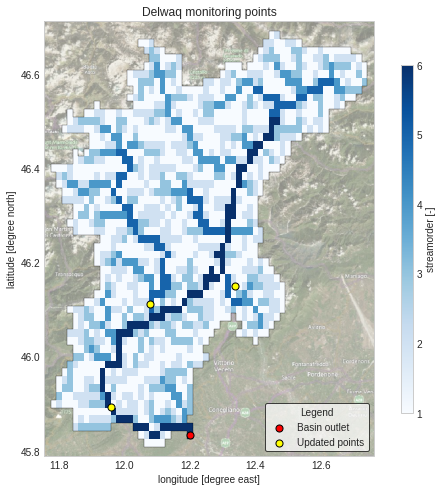

In [11]:
# Plot
plt.style.use('seaborn-whitegrid') # set nice style
# we assume the model maps are in the geographic CRS EPSG:4326
proj = ccrs.PlateCarree()
# adjust zoomlevel and figure size to your basis size & aspect
zoom_level = 10
figsize=(10, 8)

# initialize image with geoaxes
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(projection=proj)
extent = np.array(mod0.staticmaps.raster.box.buffer(0.02).total_bounds)[[0, 2, 1, 3]]
ax.set_extent(extent, crs=proj)

# add sat background image
ax.add_image(cimgt.QuadtreeTiles(), zoom_level, alpha=0.5)

# plot streamorder as background
da = mod0.staticmaps['streamorder'].raster.mask_nodata()
da.attrs.update(long_name='streamorder', units='-')
## plot streamorder map
cmap = plt.cm.get_cmap('Blues')
kwargs = dict(cmap=cmap)
da.plot(transform=proj, ax=ax, zorder=1, cbar_kwargs=dict(aspect=30, shrink=.8), **kwargs)

# plot the basin boundary
gdf_bas.boundary.plot(ax=ax, color='k', linewidth=0.3)

if 'monpoints' in mod0.staticgeoms:
    mod0.staticgeoms['monpoints'].plot(ax=ax, marker='o', markersize=50, facecolor='red', edgecolor='k', zorder=5, label='Basin outlet')
if 'monpoints' in mod1.staticgeoms:
    mod1.staticgeoms['monpoints'].plot(ax=ax, marker='o', markersize=50, facecolor='yellow', edgecolor='k', zorder=5, label='Updated points')

ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.set_ylabel(f"latitude [degree north]")
ax.set_xlabel(f"longitude [degree east]")
_ = ax.set_title(f"Delwaq monitoring points")
legend = ax.legend(
    handles=[*ax.get_legend_handles_labels()[0]],
    title="Legend",
    loc='lower right',
    frameon=True,
    framealpha=0.7,
    edgecolor='k',
    facecolor='white'
)